In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates
import numpy as np
import pandas as pd
import tensorflow as tf
from geopy.geocoders import Nominatim
import datetime
import nycsales as nyc
from scipy import stats

#basic test to load a frame and check prices with a histogram
#testframe = pd.read_csv('2015_manhattan.csv',sep = ',')
#sales = testframe['SALE PRICE']
#hist = np.histogram(sales)
#n, bins, patches = plt.hist(sales, 20, normed=1)

#concat the brooklyn data frames
years = ['06','07','08','09','10','11','12','13','14','15']
nyears = len(years)

bk15 = pd.read_csv('data/2015_brooklyn.csv',sep = ',')
bx15 = pd.read_csv('data/2015_bronx.csv',sep = ',')
m15 = pd.read_csv('data/2015_manhattan.csv',sep = ',')
q15 = pd.read_csv('data/2015_queens.csv',sep = ',')
si15 = pd.read_csv('data/2015_statenisland.csv',sep = ',')


all_15 = pd.concat([m15,bx15,bk15,q15,si15])

#convert building and lot number to lat. long.

#plot color map of prices in neighborhood

#plot basic stats of prices

#kmeans: covariate choices
#lat and long, tax class, block, building class, borough, neighborhood, gross sq. ft, total units, pice , date




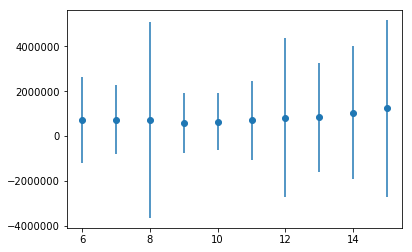

In [3]:
#calculate mean and variance for each year, by neighborhood

years = ['06','07','08','09','10','11','12','13','14','15']
#years = ['11','12','13','14','15']
nyears = len(years)
sales_mean = np.zeros((nyears,))
sales_std = np.zeros((nyears,))
for i in range(nyears):
    #print(i)
    fname = 'data/20'+years[i]+'_brooklyn.csv'
    bk = pd.read_csv(fname,sep = ',')
    sales_bk = bk.loc[bk['SALE PRICE']> 0,'SALE PRICE']
    sales_mean[i] = np.mean(sales_bk)
    sales_std[i]  = np.std(sales_bk)
    
#print(sales_mean)
#print(sales_std)
#plt.plot(map(int,years),sales_mean)
plt.errorbar(map(int,years),sales_mean, yerr=sales_std, fmt='o')
plt.show()



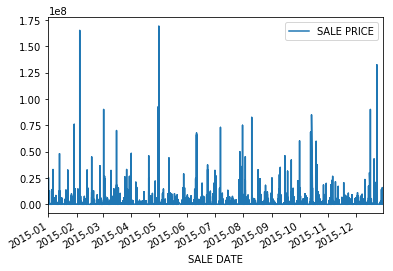

In [3]:
#timecourse of sales by borough
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')

#sort by date and plot
bk['SALE DATE'] =pd.to_datetime(bk['SALE DATE'])
bk.sort_values('SALE DATE')
bk.plot('SALE DATE','SALE PRICE')
plt.show()



In [ ]:
#price per square foot

In [24]:
#plot one borough and month of sales as a geotiff
fname = 'data/2015'+'_brooklyn.csv'
bk = pd.read_csv(fname,sep = ',')
shapecsvname = 'data/BuildingFootprints_augmented.csv'
bknew = nyc.join_latlong(bk,shapecsvname)

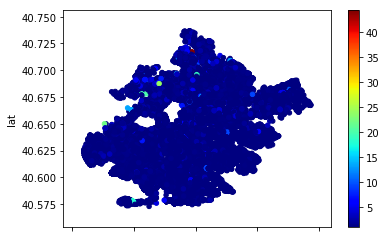

In [29]:
#grab first 2000 records
bktemp = bknew.loc[1:5000,:]
bktemp = bknew
prices = np.array(bktemp['SALE PRICE'].tolist())
zscores = stats.zscore(prices) + abs(min(stats.zscore(prices))) + 1
bktemp.plot.scatter('long','lat',c=zscores,cmap='jet')
plt.show()